<a href="https://colab.research.google.com/github/Yquetzal/Teaching_notebooks/blob/main/Pandas_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quick Introduction to pandas for data science

Pandas Dataframe are an efficient and convenient way to manipulate tabular data.

The main advantages are:

*   Many existing libraries accept Pandas Dataframe as a standard input
* If you are already familiar with R, it has many similarities
*   It imports/exports `.csv` file easily
* It is fast for many tasks (filtering, etc.)

The main drawbacks are:

* Pandas has many capabilities, but it takes time to learn how to use them, unlike usual programming which is (complex) combination of a few simple commands.
* If you have never used R, but rather used to code in C, Java, etc., it might seem an unusual way to manipulate data at first.

This notebook is only a short introduction, you can learn much more with: 

**Pandas tutorials**:  https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#getting-started

**Pandas documentation:** https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide

And as always in modern programming, with googling what you want to do :)


In [ ]:
#start by importing the library
import pandas as pd

In [ ]:
#import an example dataset.
#pandas has built-in import and export in .csv
data = pd.read_csv("http://cazabetremy.fr/Teaching/bitcoinClass/2021/trx_last_1M.csv")
data.columns = ["cl_in","cl_out","timestamp","value","valueDoll"] #Set column names

## Dataset description
This dataset is composed of a collection of 1 Million consecutive transactions in the Bitcoin Blockchain, occuring in September 7 and 8, 2016.
 

*   **cl_out** is the identifier of the user who sent coins 
*   **cl_in** is the identifier of the user who received coins
* **timestamp** is the time of the transaction in standard unix format.
* **value** is the value of the transaction in bitcoins
* **valueDoll** is the value of the transaction in Dollars



# Introducting the Pandas Dataframe

In [ ]:
#a dataframe is naturally written as a table, with each observation in a row.
data

,cl_in,cl_out,timestamp,value,valueDoll
0,21231183,2633,1473221594,0.005014,3.082268
1,21231183,21231183,1473221594,0.040328,24.793546
2,4847880,53797835,1473221594,0.019596,12.047425
3,4847880,121760693,1473221594,0.118399,72.790337
4,139771794,BTC-e.com,1473221594,0.002444,1.502412
...,...,...,...,...,...
999994,79797142,123356081,1473368159,0.837321,523.283734
999995,scammer8135,96880646,1473368159,0.022898,14.310018
999996,scammer8135,93725777,1473368159,0.000041,0.025910
999997,53071260,55730177,1473368159,0.107372,67.102000


In [ ]:
data.head() #head is useful to print only the first 5 elements.

,cl_in,cl_out,timestamp,value,valueDoll
0,21231183,2633,1473221594,0.005014,3.082268
1,21231183,21231183,1473221594,0.040328,24.793546
2,4847880,53797835,1473221594,0.019596,12.047425
3,4847880,121760693,1473221594,0.118399,72.790337
4,139771794,BTC-e.com,1473221594,0.002444,1.502412


In [ ]:
print(len(data)) #len gives the number of observations
print(data.columns) #columns gives columns names

999999
Index(['cl_in', 'cl_out', 'timestamp', 'value', 'valueDoll'], dtype='object')


In [ ]:
data.describe() #Describe provides information on numerical columns

,timestamp,value,valueDoll
count,9.999990e+05,999999.000000,9.999990e+05
mean,1.473296e+09,2.867232,1.778850e+03
std,4.271460e+04,32.170486,1.993058e+04
min,1.473222e+09,0.000000,0.000000e+00
25%,1.473258e+09,0.002308,1.433604e+00
50%,1.473294e+09,0.030000,1.874850e+01
75%,1.473336e+09,0.285015,1.768609e+02
max,1.473368e+09,18891.639834,1.161439e+07


# Accessing, inserting, etc.

A simple way to think of the organization of a dataframe is as a dictionary, with keys corresponding to columns names and values corresponding to lists. By construction, all these "lists" must be of the same length in a dataframe. 
Note that in practice, columns of the Dataframe are pandas objects called `Series`, not lists.

In [ ]:
data["cl_out"] #Get a column

0              2633
1          21231183
2          53797835
3         121760693
4         BTC-e.com
            ...    
999994    123356081
999995     96880646
999996     93725777
999997     55730177
999998     53071260
Name: cl_out, Length: 999999, dtype: object

In [ ]:
print(data[3:5])#subset rows from 3 to 5 (same notation as for lists)

       cl_in     cl_out   timestamp     value  valueDoll
3    4847880  121760693  1473221594  0.118399  72.790337
4  139771794  BTC-e.com  1473221594  0.002444   1.502412


In [ ]:
list(data["cl_in"])[:5] #get a list with the values of columns "cl_in" and keep only the first 5 elements

['21231183', '21231183', '4847880', '4847880', '139771794']

In [ ]:
data["value2"]=data["value"]*2 #creating a new column from an existing one
data["test"]=["test"]*len(data) #creating a new column from new data
data.head()

,cl_in,cl_out,timestamp,value,valueDoll,value2,test
0,21231183,2633,1473221594,0.005014,3.082268,0.010027,test
1,21231183,21231183,1473221594,0.040328,24.793546,0.080657,test
2,4847880,53797835,1473221594,0.019596,12.047425,0.039192,test
3,4847880,121760693,1473221594,0.118399,72.790337,0.236797,test
4,139771794,BTC-e.com,1473221594,0.002444,1.502412,0.004888,test


In [ ]:
#Create a new dataframe with only some of the columns
data[['cl_in', 'timestamp',"value"]]

,cl_in,timestamp,value
0,21231183,1473221594,0.005014
1,21231183,1473221594,0.040328
2,4847880,1473221594,0.019596
3,4847880,1473221594,0.118399
4,139771794,1473221594,0.002444
...,...,...,...
999994,79797142,1473368159,0.837321
999995,scammer8135,1473368159,0.022898
999996,scammer8135,1473368159,0.000041
999997,53071260,1473368159,0.107372


To filter pandas dataframe, a common method is to use **boolean indexing**. A boolean is a values which has only 2 values: True or False (Equivalently, 1 or 0).

Boolean indexing manipulates dataframe rows in 2 steps:

1.   Create a list of booleans, with value True or False for each row
2.  Keep only rows for which the value is True.



In [ ]:
# Create a list of boolean, True if the value of column "valueDoll" is above 10 
boollist= data['valueDoll']>=10
print(boollist[:5]) #check that there is indeed a value True for rows of the table where the condition is respected

0    False
1     True
2     True
3     True
4    False
Name: valueDoll, dtype: bool


In [ ]:
#We can now filter the table to keep only the rows where this value is true
data2=data[boollist]
data2.head()

,cl_in,cl_out,timestamp,value,valueDoll,value2,test
1,21231183,21231183,1473221594,0.040328,24.793546,0.080657,test
2,4847880,53797835,1473221594,0.019596,12.047425,0.039192,test
3,4847880,121760693,1473221594,0.118399,72.790337,0.236797,test
5,139771794,85172742,1473221594,0.044431,27.315937,0.088863,test
14,157519350,MINU82,1473221594,0.016456,10.116984,0.032912,test


In [ ]:
#Usually, we write this in a single line:
d=data[data['valueDoll']>=10]
#We can use boolean operators and (&), or(|), etc. :
#keeps transactions with dollar values between 10 and 30
d1=data[(data['valueDoll']>=10) & (data['valueDoll']<=30)] 

#keeps transactions with dollar values above 10 OR with timestamp = 1473221594
d2=d1[(d['valueDoll']>=10) | (d1['timestamp']==1473221594)]


#keeps transactions where the cl_out value is NOT a numeric value, with ~ meaning "not"
d3=d2[(~d2["cl_in"].astype(str).str.isnumeric())]
d3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,cl_in,cl_out,timestamp,value,valueDoll,value2,test
75,jetxsz017,jetxsz017,1473221594,0.020702,12.727512,0.041404,test
77,jetxsz017,jetxsz017,1473221594,0.030164,18.544532,0.060328,test
88,scammer8135,138686299,1473221594,0.023826,14.647913,0.047652,test
145,GeertBerkers,GeertBerkers,1473221594,0.028820,17.718051,0.057639,test
185,jetxsz017,jetxsz017,1473221594,0.032129,19.752840,0.064259,test


Note: normal boolean python operations are "and", "or", "not". But to apply those parameters on list of booleans, we need to use instead bynary operators equivalant: "and"=>&, "or"=>|, "not"=>~.
You can check for instance https://www.geeksforgeeks.org/difference-between-and-and-in-python/ to fully understand the difference.

#Group By: split-apply-combine
Group by operations allow to group some rows based on their values in a column, and then to merge them into a single row, with the values of the row being some combination of the values of the merged ones. Let's see examples.

In [ ]:
#Count the number of transactions per timestamp
#-groupby("timestamp") means that we want to keep one row per timestamp
#-count() means that we simply want to count how many rows there are by timestamp
countTimestamp = data.groupby("timestamp").count()
print(countTimestamp.head())

            cl_in  cl_out  value  valueDoll  value2  test
timestamp                                                
1473221594   2425    2425   2425       2425    2425  2425
1473221742   1333    1333   1333       1333    1333  1333
1473221852   1039    1039   1039       1039    1039  1039
1473222408   4870    4870   4870       4870    4870  4870
1473223188   4226    4226   4226       4226    4226  4226


In [ ]:
#Count the sum of values in each columns for each user sending at least a transaction.
#-with sum, we compute the sum of all the rows that are grouped
sumUsers = data.groupby("cl_out").sum()
#Print the sum of values sent by user
print(sumUsers["value"].head())
#We could also use min, max, std (standard deviation), mean, and others instead of sum().

cl_out
100000113    103.787414
100000925      0.024876
100001395      0.756372
100002017      0.024711
100002167      0.109612
Name: value, dtype: float64


In [ ]:
#The keyword "agg" allows to control more precisely the way to aggregate groups of rows. 
#For instance, here we want to compute for the column "value", the sum, count, max, mean and min properties
sum_and_count=data.groupby("cl_out").agg({'value': ['sum','count',"max","mean","min"]})
print(sum_and_count.head())
#Since columns now have 2 levels of names, you need to use a pair to name them.
print("\n mean top 5: \n", sum_and_count[("value","mean")][:5])

                value                                          
                  sum count         max        mean         min
cl_out                                                         
100000113  103.787414     1  103.787414  103.787414  103.787414
100000925    0.024876     1    0.024876    0.024876    0.024876
100001395    0.756372     1    0.756372    0.756372    0.756372
100002017    0.024711     2    0.021668    0.012356    0.003043
100002167    0.109612     1    0.109612    0.109612    0.109612

 mean top 5: 
 cl_out
100000113    103.787414
100000925      0.024876
100001395      0.756372
100002017      0.012356
100002167      0.109612
Name: (value, mean), dtype: float64


# Sorting

In [ ]:
#Sort the original data according to the amount of transactions, largest first
sorted = data.sort_values("value", ascending=[False])
print(sorted.head())

                        cl_in                 cl_out  ...        value2  test
3138    LocalBitcoins.com-old  LocalBitcoins.com-old  ...  37783.279667  test
977260                9256583              105795887  ...  12238.638804  test
691762              109990063              101642088  ...  10505.549467  test
874078               24966308               24966308  ...  10483.903920  test
706845                   9678                9256583  ...   8001.397382  test

[5 rows x 7 columns]


In [ ]:
#Sorting the aggregation done before, to get users with largest amounts sent first
print(sumUsers.sort_values("value", ascending=[False]).head())

                   timestamp          value     valueDoll         value2
cl_out                                                                  
572656        24304924061849  373254.827693  2.313816e+08  746509.655386
119945496      2320443305879  110838.884098  6.872171e+07  221677.768196
58708912        914938850062   34928.691515  2.182357e+07   69857.383029
Huobi.com-2   12695331276361   33221.566507  2.061997e+07   66443.133013
Poloniex.com   5460050701987   31365.384697  1.943337e+07   62730.769395


# Date
Python has a standard class to manipulate dates (datetime), useful to extract the day of the weak, to increase a date by one hour, one week, etc. Pandas also has those functionalites

In [ ]:
#transforming from timestamp to the "datetime" standard format
data['date'] = pd.to_datetime(data['timestamp'],unit='s')
print(data.head())

       cl_in     cl_out   timestamp  ...    value2  test                date
0   21231183       2633  1473221594  ...  0.010027  test 2016-09-07 04:13:14
1   21231183   21231183  1473221594  ...  0.080657  test 2016-09-07 04:13:14
2    4847880   53797835  1473221594  ...  0.039192  test 2016-09-07 04:13:14
3    4847880  121760693  1473221594  ...  0.236797  test 2016-09-07 04:13:14
4  139771794  BTC-e.com  1473221594  ...  0.004888  test 2016-09-07 04:13:14

[5 rows x 8 columns]


In [ ]:
#filter to keep only transactions occuring between 20:00 and 23:00
data[(data["date"].dt.hour>=20) & (data["date"].dt.hour<23)].head()

,cl_in,cl_out,timestamp,value,valueDoll,value2,test,date
397978,61923327,yuni1978,1473278929,0.003380,2.077990,0.006760,test,2016-09-07 20:08:49
397979,61923327,61923327,1473278929,3.098886,1905.164290,6.197773,test,2016-09-07 20:08:49
397980,56898470,123706968,1473278929,0.000055,0.033568,0.000109,test,2016-09-07 20:08:49
397981,56898470,80873869,1473278929,0.027069,16.641751,0.054138,test,2016-09-07 20:08:49
397982,117749919,60416302,1473278929,0.000437,0.268731,0.000874,test,2016-09-07 20:08:49


In [ ]:
#Compute the total amount of transactions made by hour
data.groupby(data["date"].dt.floor("h")).sum()["value"]

date
2016-09-07 04:00:00     53815.874447
2016-09-07 05:00:00     50326.836331
2016-09-07 06:00:00     61560.013593
2016-09-07 07:00:00     29532.376492
2016-09-07 08:00:00     59067.325182
2016-09-07 09:00:00    151775.975763
2016-09-07 10:00:00     39970.795887
2016-09-07 11:00:00     67318.995925
2016-09-07 12:00:00     66393.169340
2016-09-07 13:00:00    174143.891065
2016-09-07 14:00:00    100954.518925
2016-09-07 15:00:00    101487.087924
2016-09-07 16:00:00     75468.458567
2016-09-07 17:00:00     68649.327163
2016-09-07 18:00:00     42288.292904
2016-09-07 19:00:00     45728.451356
2016-09-07 20:00:00     59363.059290
2016-09-07 21:00:00     34234.463406
2016-09-07 22:00:00     25766.139911
2016-09-07 23:00:00     52241.302936
2016-09-08 00:00:00     26160.997385
2016-09-08 01:00:00     53574.901374
2016-09-08 02:00:00     45780.546876
2016-09-08 03:00:00     35772.993086
2016-09-08 04:00:00     54227.872295
2016-09-08 05:00:00     51413.009582
2016-09-08 06:00:00     37542.667

# Plotting
Pandas has a simple interface built on top of matplotlib and thus compatible with it to draw simple plots.

If you need more advanced plots, I recommend the `seaborn` library, that also accept pandas dataframe as input

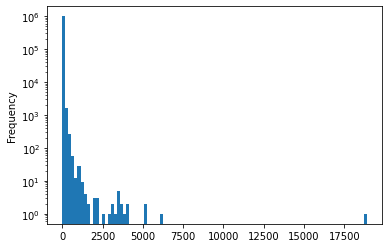

In [ ]:
#Plot the distribution of values of transactions
ax=data["value"].plot.hist(stacked=True, bins=100)
ax.set_yscale('log') #with log scale to better see the distribution
#(note that ax.set_yscale is a normal pyplot command )

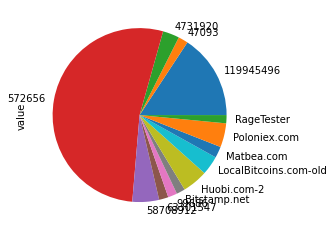

In [ ]:
#Piechart of amounts sent by users, for users who have sent more than 10000 btc
sumUsers["value"][sumUsers["value"]>10000].plot.pie()

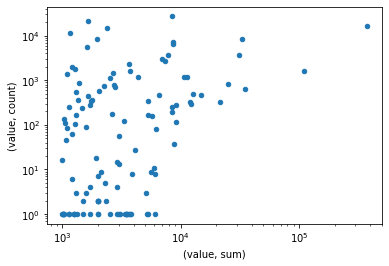

In [ ]:
#plot the relation between the sum of amounts sent and the number of transactions, 
#for users who have sent more than 1000 btc
sum_and_count=data.groupby("cl_out").agg({'value': ['sum','count',"max","mean","min"]})
main_users=sum_and_count[sum_and_count[("value","sum")]>1000]
ax=main_users.plot.scatter(x=("value","sum"),y=("value","count"))
ax.set_xscale('log')#with log scale to better see the distribution
ax.set_yscale('log')#with log scale to better see the distribution

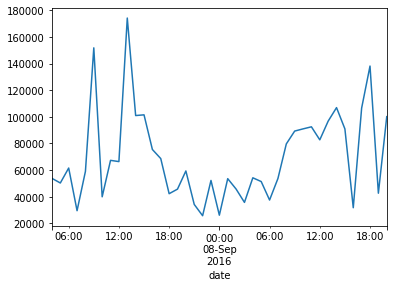

In [ ]:
#Plot the evolution of the number of transaction per hour
data.groupby(data["date"].dt.floor("h")).sum()["value"].plot()